In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

In [2]:
matplotlib inline

In [3]:
plt.style.use('ggplot')

### The dataset

"The Chicago Park District maintains sensors in the water at beaches along Chicago's Lake Michigan lakefront. These sensors generally capture the indicated measurements hourly while the sensors are in operation during the summer. During other seasons and at some other times, information from the sensors may not be available. See https://data.cityofchicago.org/d/k7hf-8y75 for a dataset with land-based weather measurements at selected beaches. The sensor locations are listed at https://data.cityofchicago.org/d/g3ip-u8rb."

Data source: [Dataworld](https://data.world/cityofchicago/beach-water-quality-automated-sensors/workspace/file?filename=beach-water-quality-automated-sensors-1.csv)

#### In order to do exploratory data analysis, load the file `beach-water-quality-automated-sensors-1.csv` and explore the data.

In [4]:
data = pd.read_csv('beach-water-quality-automated-sensors-1.csv', sep=',', parse_dates=['Measurement Timestamp Label'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34923 entries, 0 to 34922
Data columns (total 10 columns):
Beach Name                     34923 non-null object
Measurement Timestamp          34917 non-null object
Water Temperature              34917 non-null float64
Turbidity                      34917 non-null float64
Transducer Depth               10034 non-null float64
Wave Height                    34690 non-null float64
Wave Period                    34690 non-null float64
Battery Life                   34917 non-null float64
Measurement Timestamp Label    34917 non-null datetime64[ns]
Measurement ID                 34923 non-null object
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 2.7+ MB


In [6]:
#Finding all the unique beach names
data['Beach Name'].unique()

array(['Montrose Beach', 'Ohio Street Beach', 'Calumet Beach',
       '63rd Street Beach', 'Osterman Beach', 'Rainbow Beach'],
      dtype=object)

#### Determine what the data is about, what the measurements look like. You need to plot some graphs to determine the trends in the data. And determine missing values and show how to deal with them. 

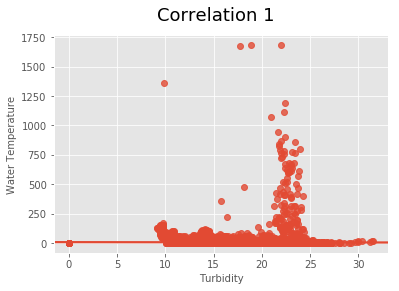

In [7]:
fig = sns.regplot(data['Water Temperature'], data['Turbidity'])
fig.figure.suptitle("Correlation 1", fontsize = 18)
plt.xlabel('Turbidity', fontsize=10)
plt.ylabel('Water Temperature', fontsize=10)
plt.show(fig)

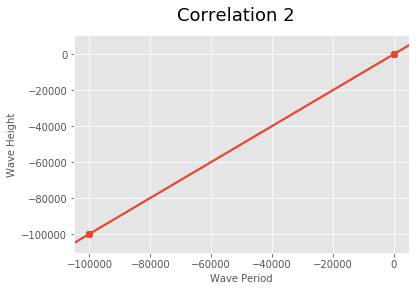

In [8]:
fig = sns.regplot(data['Wave Height'], data['Wave Period'])
fig.figure.suptitle("Correlation 2", fontsize = 18)
plt.xlabel('Wave Period', fontsize=10)
plt.ylabel('Wave Height', fontsize=10)
plt.show(fig)

In [9]:
#NAN values are replaced with means values for the following:

data['Water Temperature'].fillna(data['Water Temperature'].mean(), inplace=True)
data['Turbidity'].fillna(data['Turbidity'].mean(), inplace=True)
data['Transducer Depth'].fillna(data['Transducer Depth'].mean(), inplace=True)
data['Wave Height'].fillna(data['Wave Height'].mean(), inplace=True)
data['Wave Period'].fillna(data['Wave Period'].mean(), inplace=True)
data['Battery Life'].fillna(data['Battery Life'].mean(), inplace=True)

# Revoming rows with Beach Name,Measurement Timestamp,Measurement Timestamp Label, Measurement ID
data.dropna(axis=0, inplace=True)

In [10]:
#Last check for null values
data.isnull().sum()

Beach Name                     0
Measurement Timestamp          0
Water Temperature              0
Turbidity                      0
Transducer Depth               0
Wave Height                    0
Wave Period                    0
Battery Life                   0
Measurement Timestamp Label    0
Measurement ID                 0
dtype: int64

#### Provide descriptive statistics.

In [11]:
data.describe()

,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life
count,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000,34917.000000
mean,19.363387,4.823575,1.570235,-1516.116166,-1512.482041,11.038205
std,3.356908,33.506600,0.093872,12180.456214,12180.906771,0.771769
min,0.000000,0.000000,-0.082000,-99999.992000,-100000.000000,4.800000
25%,17.100000,0.660000,1.570235,0.109000,3.000000,10.600000
50%,19.600000,1.260000,1.570235,0.154000,3.000000,11.000000
75%,22.000000,2.540000,1.570235,0.200000,4.000000,11.500000
max,31.500000,1683.480000,2.214000,1.467000,10.000000,13.300000


#### Exploring trends and distributions in the data. You may also want to visualize the ranges of the variables in the dataset. Plot histograms of the variables to see what these ranges look like.

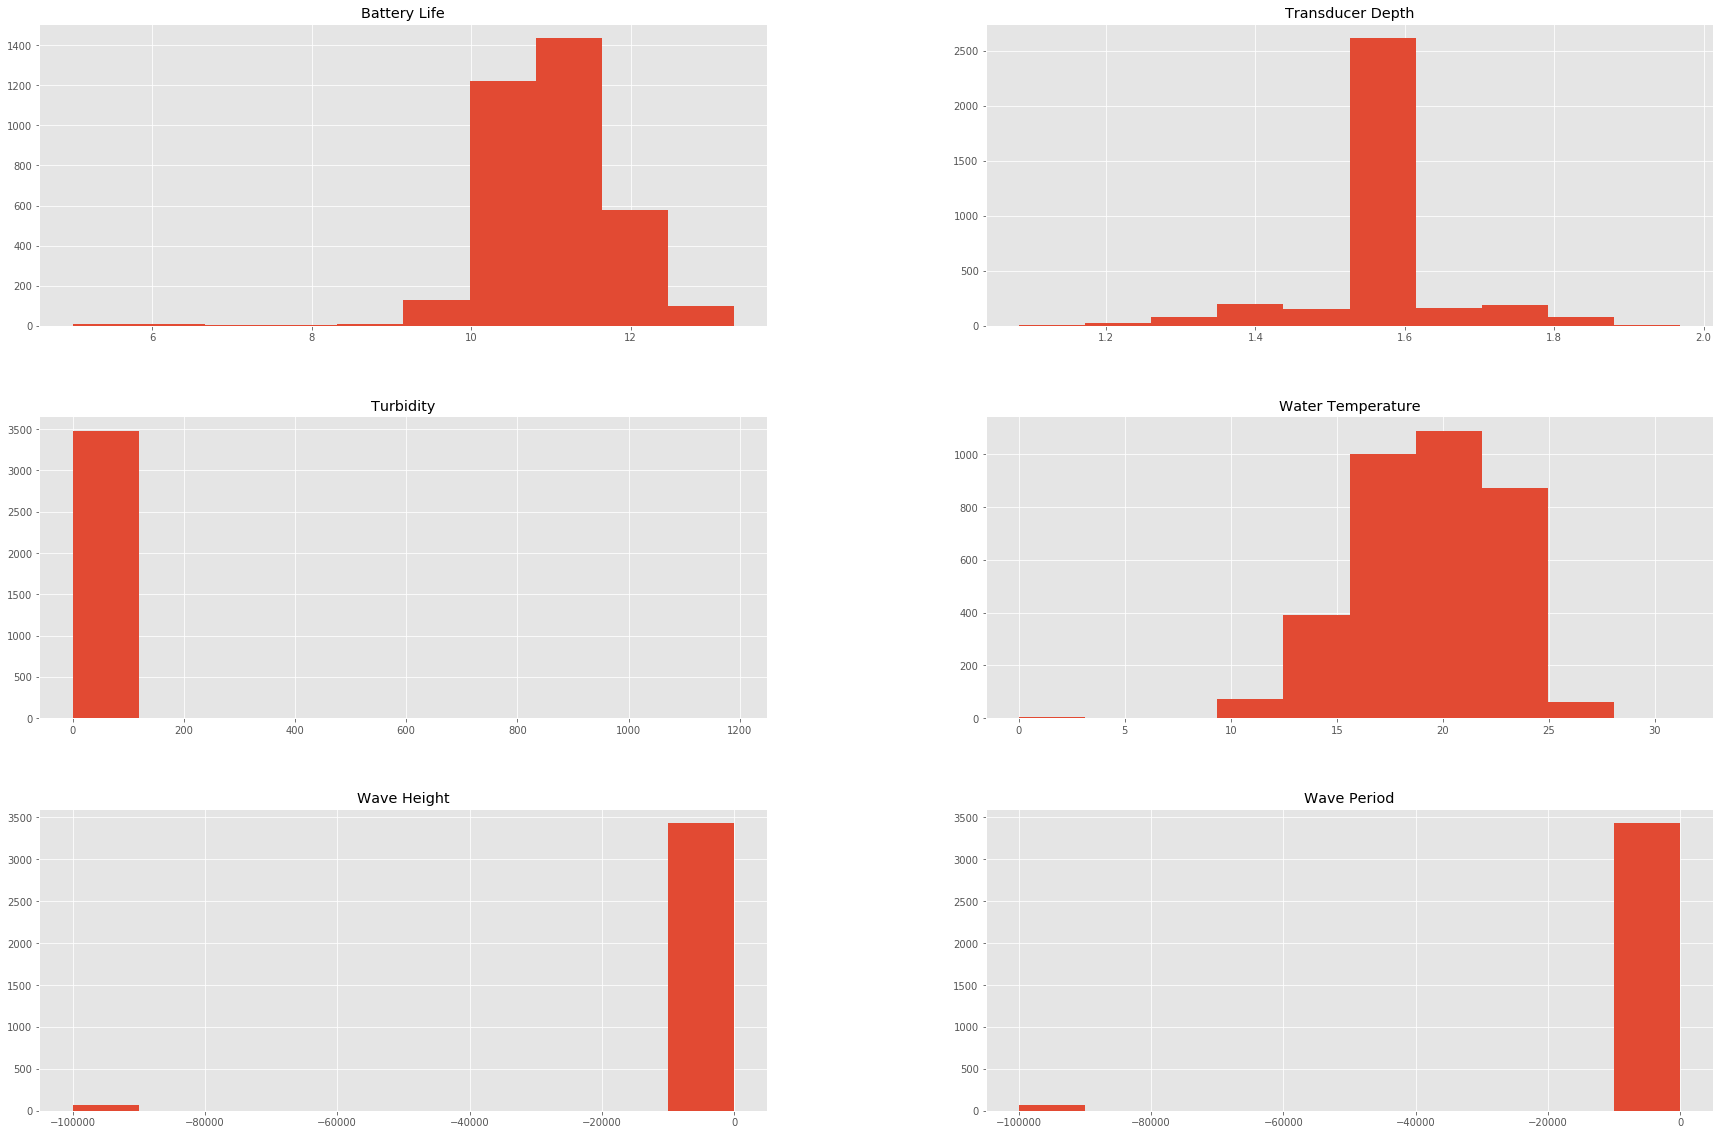

In [12]:
pd.DataFrame.hist(data.sample(frac=0.1), figsize = [30,20]);

#### Exploring correlations. What sorts of correlations do you observe between the variables in the dataset? Let'sa consider correlation coefficients $ r \geq 70$ as significant. Discuss your results.

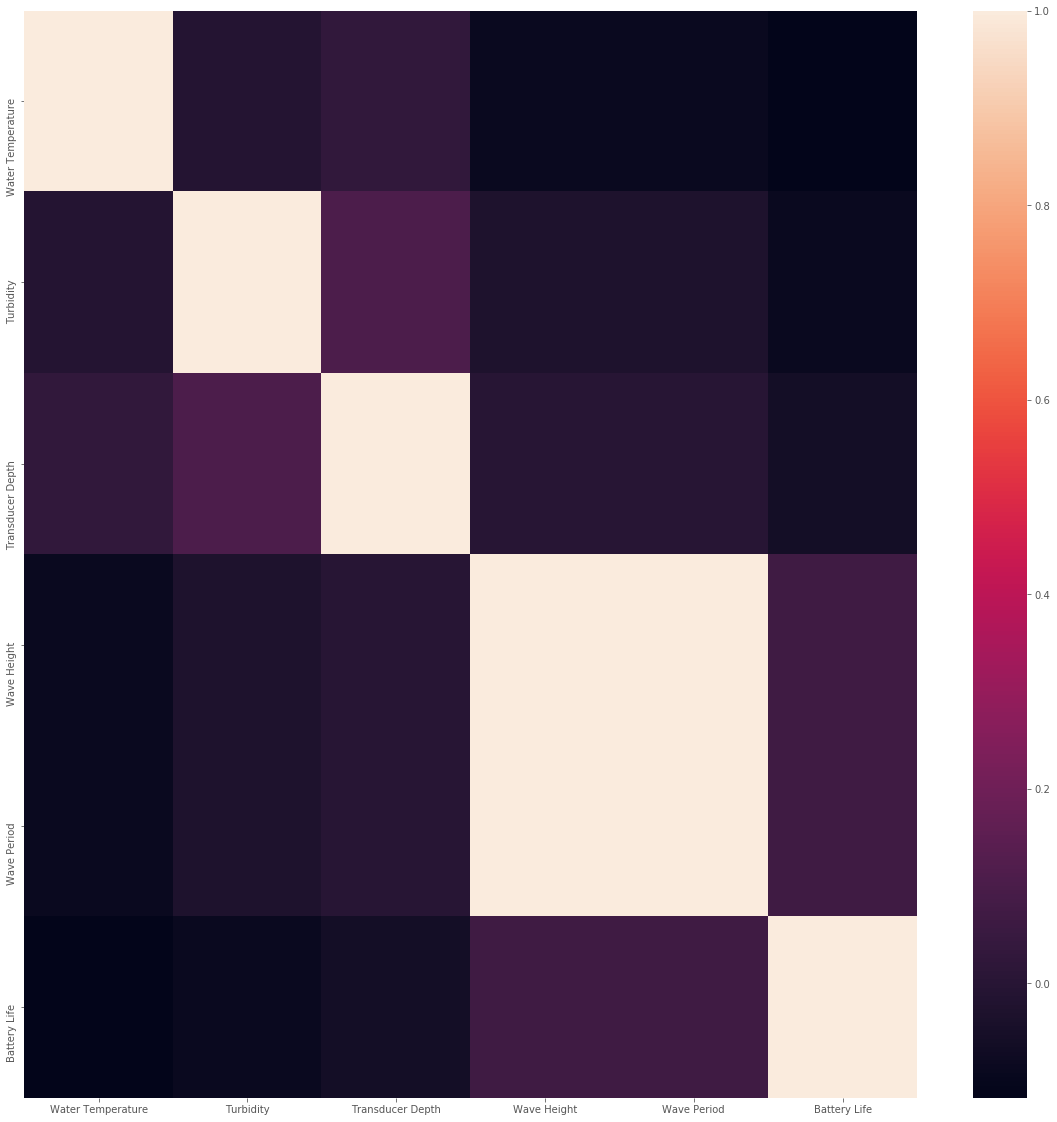

In [13]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Discussion (albeit a bit too in depth): Do not observe high correlations between variables. There is a positive correlation (not a significant one) between transducer depth and wave height, and between transducer depth and turbidity (again not significant). A bit of research says some transducers receive echoes in order to measure depth. So therefore there is some correlation between wave height measured by the transducer and where it is placed.

#### Sampling from the data. Sample from the dataset by selecting a readings for a year for a particular beach.

In [14]:
MontroseBeach = data.loc[data['Beach Name'] == 'Montrose Beach']
MontroseBeach.index = MontroseBeach['Measurement Timestamp Label']
MontroseBeach = MontroseBeach.sort_index(axis=0)
MontroseBeach = MontroseBeach.loc['2014-05-28 13:00:00':'2015-07-06 11:00:00']
MontroseBeach

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
Measurement Timestamp Label,,,,,,,,,,
2014-05-28 13:00:00,Montrose Beach,05/28/2014 01:00:00 PM,14.5,2.72,1.395000,0.306,3.0,11.9,2014-05-28 13:00:00,MontroseBeach201405281300
2014-05-28 14:00:00,Montrose Beach,05/28/2014 02:00:00 PM,14.8,2.97,1.386000,0.328,3.0,11.9,2014-05-28 14:00:00,MontroseBeach201405281400
2014-05-28 15:00:00,Montrose Beach,05/28/2014 03:00:00 PM,14.5,4.30,1.377000,0.328,3.0,11.9,2014-05-28 15:00:00,MontroseBeach201405281500
2014-05-28 16:00:00,Montrose Beach,05/28/2014 04:00:00 PM,14.4,4.87,1.366000,0.341,3.0,11.9,2014-05-28 16:00:00,MontroseBeach201405281600
2014-05-28 17:00:00,Montrose Beach,05/28/2014 05:00:00 PM,14.1,5.06,1.382000,0.340,4.0,11.9,2014-05-28 17:00:00,MontroseBeach201405281700
2014-05-28 18:00:00,Montrose Beach,05/28/2014 06:00:00 PM,14.2,5.76,1.415000,0.356,3.0,11.9,2014-05-28 18:00:00,MontroseBeach201405281800
2014-05-28 19:00:00,Montrose Beach,05/28/2014 07:00:00 PM,14.2,6.32,1.386000,0.346,3.0,11.9,2014-05-28 19:00:00,MontroseBeach201405281900
2014-05-28 20:00:00,Montrose Beach,05/28/2014 08:00:00 PM,14.4,6.89,1.401000,0.380,4.0,11.9,2014-05-28 20:00:00,MontroseBeach201405282000
2014-05-28 21:00:00,Montrose Beach,05/28/2014 09:00:00 PM,14.5,7.11,1.374000,0.361,5.0,11.9,2014-05-28 21:00:00,MontroseBeach201405282100


Continue to explore correlations and trends in this subsample if you so wish.

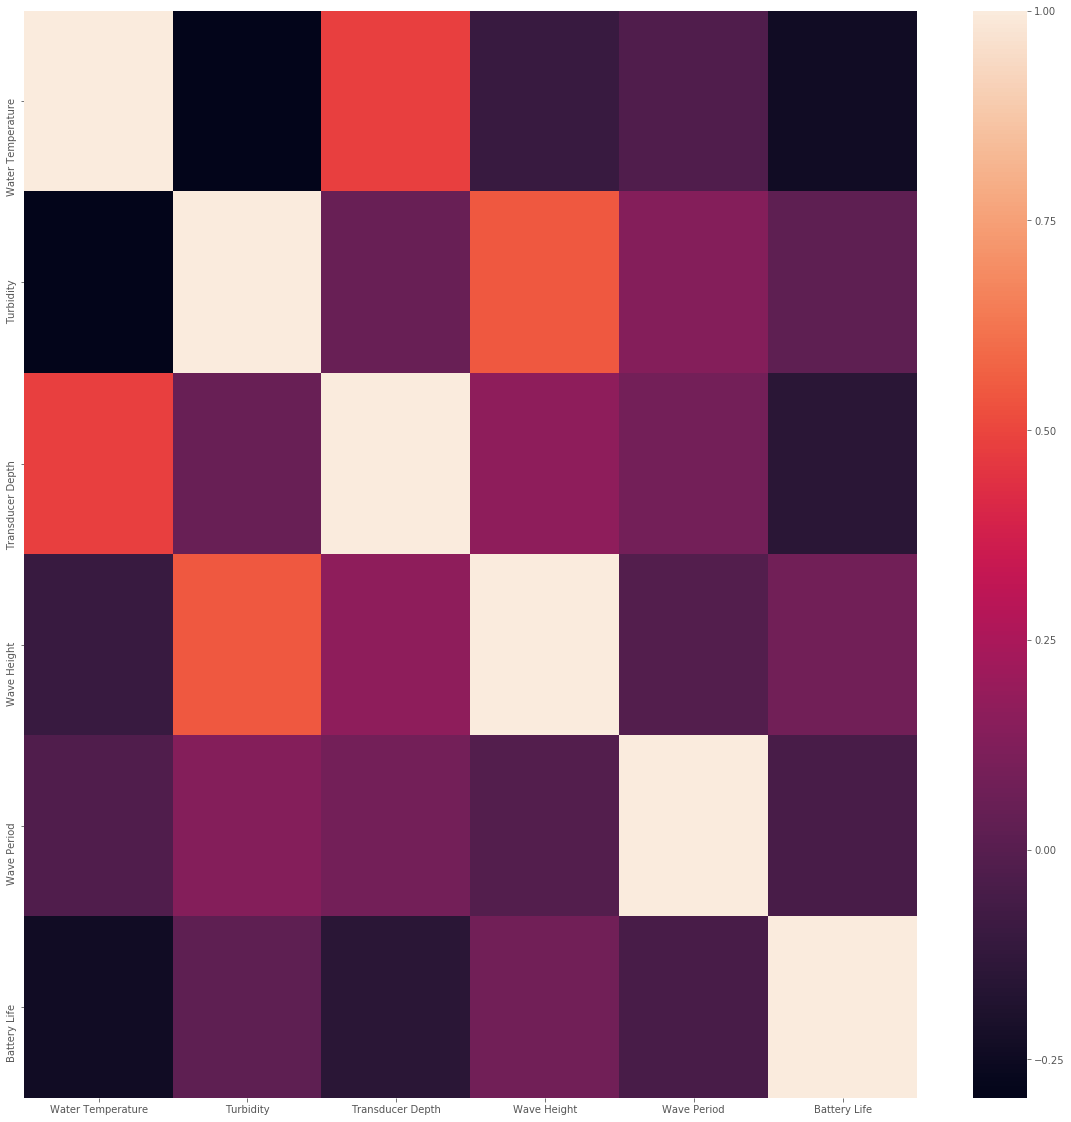

In [15]:
##Correlation

corr =  MontroseBeach.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DA21123C8>,
      dtype=object)

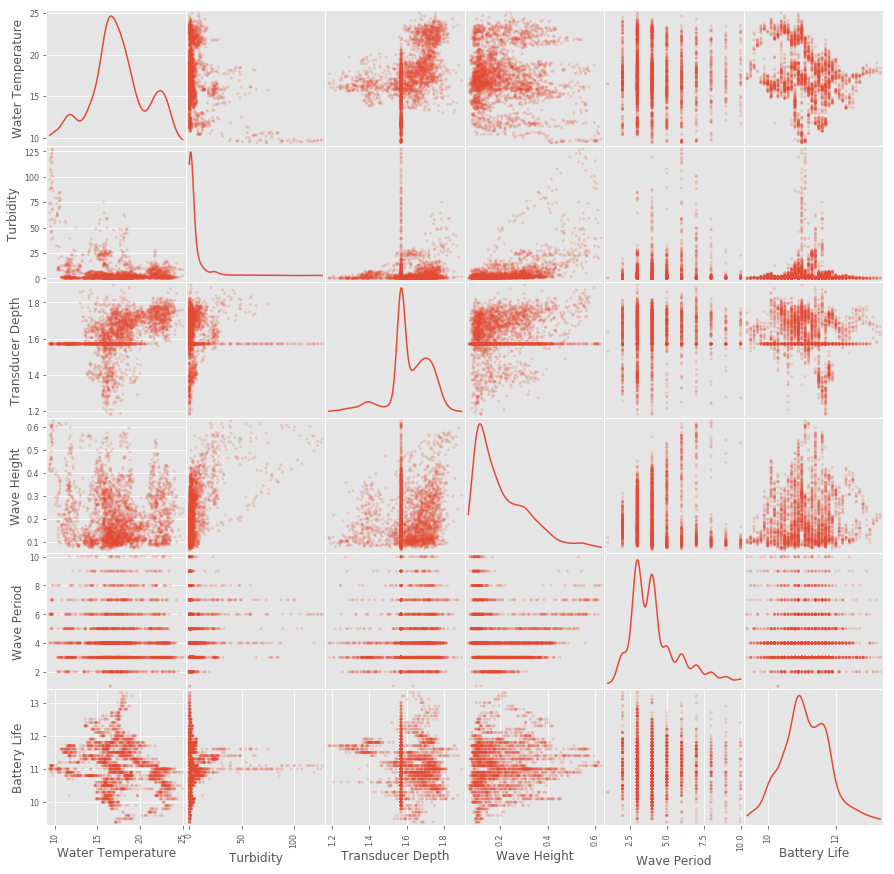

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(MontroseBeach, alpha=0.2, figsize=(15,15 ), diagonal='kde')

#### Hypothesis testing. Pick any two beaches. We formulate the hypothesis that there is no difference in mean water temperature between the two beaches. How would you go about testing this hypothesis? Show your code below. Do not forget how to deal with missing values.

In [17]:
Alist = (data.loc[data['Beach Name'] == 'Montrose Beach',['Water Temperature']])
Blist = (data.loc[data['Beach Name'] == 'Ohio Street Beach', ['Water Temperature']])
Alist['Water Temperature'].fillna(Alist['Water Temperature'].mean(), inplace=True)
Blist['Water Temperature'].fillna(Blist['Water Temperature'].mean(), inplace=True)
Blist.isnull().sum()

Water Temperature    0
dtype: int64

H0: The null hypothesis is that the means are  the same - i.e. There is no difference in mean water temperature between the two beaches
H1: There is a difference between the two beaches

In [18]:
GrandMean = (Alist['Water Temperature'].sum()+ Blist['Water Temperature'].sum())/(Alist.shape[0] + Blist.shape[0])
print( "A mean: %s  B mean: %s and the GrandMean: %s" %(Alist.mean(),  Blist.mean(),GrandMean ))

A mean: Water Temperature    18.640534
dtype: float64  B mean: Water Temperature    20.273603
dtype: float64 and the GrandMean: 19.559024683925344


In [19]:
SST  = ((Alist['Water Temperature'] - GrandMean)**2).sum()

SSTG = (Alist.shape[0] + Blist.shape[0])*((Alist['Water Temperature'].mean()- GrandMean)**2).sum() + (Alist.shape[0] + Blist.shape[0])*((Blist['Water Temperature'].mean()- GrandMean)**2).sum()
         
SSTE = ((Alist['Water Temperature'] - Alist['Water Temperature'].mean())**2).sum() + ((Blist['Water Temperature'] - Blist['Water Temperature'].mean())**2).sum()

#To make the sum of squares comparable, we divide each one by their associated degrees of freedom
MSTG = SSTG/(2-1)
MSTE = SSTE/((Alist.shape[0] + Blist.shape[0])-2)

#The test statistic is the ratio of group and error mean squares
F = MSTG/MSTE
print("The p-value =",1-stats.f.cdf(F, dfn=1, dfd=(Alist.shape[0] + Blist.shape[0])-2))

The p-value = 1.1102230246251565e-16


Since the p-value is more than the assumed significance value of 0.05, there is significant evidence in support of the null hypothesis.

#### Conclusion.

The assessment tests how to show trends in data and test a simple hypothesis about the trends in the data. 